In [1]:
# multivariate output multi-step 1d cnn example
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [3]:
dataset = pd.read_csv('borhci.csv', header=0, index_col=0)
#dataset=dataset.del((:,0))
dataset = dataset.drop((c for c in dataset.columns[-6:]), axis=1)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# choose a number of time steps
n_steps_in, n_steps_out = 12, 3
# convert into input/output
X_train, y_train = split_sequences(scaled[:-12,:], n_steps_in, n_steps_out)
# flatten output

n_output = y_train.shape[1] * y_train.shape[2]
y_train = y_train.reshape((y_train.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X_train.shape[2]
test = scaled[-39:,:]
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
#X_test = X_test.reshape((1, n_steps_in, n_features))
#y_test = y_test.reshape((1, n_steps_out, n_features))
y_test = y_test.reshape((y_test.shape[0], n_output))


In [4]:
y_test.shape

(25, 24)

Train on 254 samples, validate on 25 samples
Epoch 1/2000
 - 2s - loss: 0.3991 - val_loss: 0.2810
Epoch 2/2000
 - 0s - loss: 0.3109 - val_loss: 0.2769
Epoch 3/2000
 - 0s - loss: 0.2818 - val_loss: 0.2806
Epoch 4/2000
 - 0s - loss: 0.2671 - val_loss: 0.2837
Epoch 5/2000
 - 0s - loss: 0.2583 - val_loss: 0.2852
Epoch 6/2000
 - 0s - loss: 0.2540 - val_loss: 0.2857
Epoch 7/2000
 - 0s - loss: 0.2519 - val_loss: 0.2850
Epoch 8/2000
 - 0s - loss: 0.2494 - val_loss: 0.2830
Epoch 9/2000
 - 0s - loss: 0.2480 - val_loss: 0.2812
Epoch 10/2000
 - 0s - loss: 0.2477 - val_loss: 0.2790
Epoch 11/2000
 - 0s - loss: 0.2472 - val_loss: 0.2767
Epoch 12/2000
 - 0s - loss: 0.2467 - val_loss: 0.2752
Epoch 13/2000
 - 0s - loss: 0.2464 - val_loss: 0.2736
Epoch 14/2000
 - 0s - loss: 0.2458 - val_loss: 0.2713
Epoch 15/2000
 - 0s - loss: 0.2454 - val_loss: 0.2699
Epoch 16/2000
 - 0s - loss: 0.2452 - val_loss: 0.2683
Epoch 17/2000
 - 0s - loss: 0.2449 - val_loss: 0.2669
Epoch 18/2000
 - 0s - loss: 0.2443 - val_loss:

Epoch 152/2000
 - 0s - loss: 0.1778 - val_loss: 0.2831
Epoch 153/2000
 - 0s - loss: 0.1792 - val_loss: 0.2829
Epoch 154/2000
 - 0s - loss: 0.1761 - val_loss: 0.2826
Epoch 155/2000
 - 0s - loss: 0.1773 - val_loss: 0.2830
Epoch 156/2000
 - 0s - loss: 0.1775 - val_loss: 0.2832
Epoch 157/2000
 - 0s - loss: 0.1759 - val_loss: 0.2827
Epoch 158/2000
 - 0s - loss: 0.1760 - val_loss: 0.2826
Epoch 159/2000
 - 0s - loss: 0.1750 - val_loss: 0.2831
Epoch 160/2000
 - 0s - loss: 0.1746 - val_loss: 0.2830
Epoch 161/2000
 - 0s - loss: 0.1741 - val_loss: 0.2834
Epoch 162/2000
 - 0s - loss: 0.1757 - val_loss: 0.2838
Epoch 163/2000
 - 0s - loss: 0.1746 - val_loss: 0.2839
Epoch 164/2000
 - 0s - loss: 0.1746 - val_loss: 0.2836
Epoch 165/2000
 - 0s - loss: 0.1733 - val_loss: 0.2836
Epoch 166/2000
 - 0s - loss: 0.1716 - val_loss: 0.2836
Epoch 167/2000
 - 0s - loss: 0.1742 - val_loss: 0.2836
Epoch 168/2000
 - 0s - loss: 0.1752 - val_loss: 0.2836
Epoch 169/2000
 - 0s - loss: 0.1722 - val_loss: 0.2833
Epoch 170/

Epoch 301/2000
 - 0s - loss: 0.1634 - val_loss: 0.2703
Epoch 302/2000
 - 0s - loss: 0.1653 - val_loss: 0.2699
Epoch 303/2000
 - 0s - loss: 0.1641 - val_loss: 0.2700
Epoch 304/2000
 - 0s - loss: 0.1668 - val_loss: 0.2702
Epoch 305/2000
 - 0s - loss: 0.1649 - val_loss: 0.2701
Epoch 306/2000
 - 0s - loss: 0.1637 - val_loss: 0.2699
Epoch 307/2000
 - 0s - loss: 0.1638 - val_loss: 0.2697
Epoch 308/2000
 - 0s - loss: 0.1647 - val_loss: 0.2696
Epoch 309/2000
 - 0s - loss: 0.1641 - val_loss: 0.2699
Epoch 310/2000
 - 0s - loss: 0.1657 - val_loss: 0.2699
Epoch 311/2000
 - 0s - loss: 0.1643 - val_loss: 0.2700
Epoch 312/2000
 - 0s - loss: 0.1645 - val_loss: 0.2699
Epoch 313/2000
 - 0s - loss: 0.1638 - val_loss: 0.2698
Epoch 314/2000
 - 0s - loss: 0.1653 - val_loss: 0.2700
Epoch 315/2000
 - 0s - loss: 0.1667 - val_loss: 0.2699
Epoch 316/2000
 - 0s - loss: 0.1640 - val_loss: 0.2697
Epoch 317/2000
 - 0s - loss: 0.1683 - val_loss: 0.2695
Epoch 318/2000
 - 0s - loss: 0.1679 - val_loss: 0.2694
Epoch 319/

Epoch 450/2000
 - 0s - loss: 0.1518 - val_loss: 0.2628
Epoch 451/2000
 - 0s - loss: 0.1513 - val_loss: 0.2626
Epoch 452/2000
 - 0s - loss: 0.1515 - val_loss: 0.2626
Epoch 453/2000
 - 0s - loss: 0.1524 - val_loss: 0.2625
Epoch 454/2000
 - 0s - loss: 0.1537 - val_loss: 0.2624
Epoch 455/2000
 - 0s - loss: 0.1532 - val_loss: 0.2624
Epoch 456/2000
 - 0s - loss: 0.1524 - val_loss: 0.2624
Epoch 457/2000
 - 0s - loss: 0.1533 - val_loss: 0.2624
Epoch 458/2000
 - 0s - loss: 0.1526 - val_loss: 0.2625
Epoch 459/2000
 - 0s - loss: 0.1518 - val_loss: 0.2624
Epoch 460/2000
 - 0s - loss: 0.1523 - val_loss: 0.2625
Epoch 461/2000
 - 0s - loss: 0.1538 - val_loss: 0.2622
Epoch 462/2000
 - 0s - loss: 0.1527 - val_loss: 0.2624
Epoch 463/2000
 - 0s - loss: 0.1538 - val_loss: 0.2623
Epoch 464/2000
 - 0s - loss: 0.1505 - val_loss: 0.2622
Epoch 465/2000
 - 0s - loss: 0.1510 - val_loss: 0.2622
Epoch 466/2000
 - 0s - loss: 0.1498 - val_loss: 0.2622
Epoch 467/2000
 - 0s - loss: 0.1528 - val_loss: 0.2620
Epoch 468/

Epoch 599/2000
 - 0s - loss: 0.1510 - val_loss: 0.2573
Epoch 600/2000
 - 0s - loss: 0.1493 - val_loss: 0.2572
Epoch 601/2000
 - 0s - loss: 0.1464 - val_loss: 0.2571
Epoch 602/2000
 - 0s - loss: 0.1489 - val_loss: 0.2572
Epoch 603/2000
 - 0s - loss: 0.1492 - val_loss: 0.2570
Epoch 604/2000
 - 0s - loss: 0.1466 - val_loss: 0.2568
Epoch 605/2000
 - 0s - loss: 0.1495 - val_loss: 0.2569
Epoch 606/2000
 - 0s - loss: 0.1498 - val_loss: 0.2568
Epoch 607/2000
 - 0s - loss: 0.1463 - val_loss: 0.2568
Epoch 608/2000
 - 0s - loss: 0.1506 - val_loss: 0.2567
Epoch 609/2000
 - 0s - loss: 0.1459 - val_loss: 0.2566
Epoch 610/2000
 - 0s - loss: 0.1462 - val_loss: 0.2566
Epoch 611/2000
 - 0s - loss: 0.1484 - val_loss: 0.2564
Epoch 612/2000
 - 0s - loss: 0.1499 - val_loss: 0.2564
Epoch 613/2000
 - 0s - loss: 0.1470 - val_loss: 0.2566
Epoch 614/2000
 - 0s - loss: 0.1490 - val_loss: 0.2566
Epoch 615/2000
 - 0s - loss: 0.1457 - val_loss: 0.2564
Epoch 616/2000
 - 0s - loss: 0.1510 - val_loss: 0.2564
Epoch 617/

Epoch 748/2000
 - 0s - loss: 0.1457 - val_loss: 0.2516
Epoch 749/2000
 - 0s - loss: 0.1486 - val_loss: 0.2517
Epoch 750/2000
 - 0s - loss: 0.1470 - val_loss: 0.2517
Epoch 751/2000
 - 0s - loss: 0.1462 - val_loss: 0.2516
Epoch 752/2000
 - 0s - loss: 0.1451 - val_loss: 0.2515
Epoch 753/2000
 - 0s - loss: 0.1462 - val_loss: 0.2514
Epoch 754/2000
 - 0s - loss: 0.1459 - val_loss: 0.2514
Epoch 755/2000
 - 0s - loss: 0.1451 - val_loss: 0.2512
Epoch 756/2000
 - 0s - loss: 0.1457 - val_loss: 0.2511
Epoch 757/2000
 - 0s - loss: 0.1459 - val_loss: 0.2511
Epoch 758/2000
 - 0s - loss: 0.1446 - val_loss: 0.2511
Epoch 759/2000
 - 0s - loss: 0.1448 - val_loss: 0.2511
Epoch 760/2000
 - 0s - loss: 0.1466 - val_loss: 0.2509
Epoch 761/2000
 - 0s - loss: 0.1468 - val_loss: 0.2511
Epoch 762/2000
 - 0s - loss: 0.1433 - val_loss: 0.2511
Epoch 763/2000
 - 0s - loss: 0.1439 - val_loss: 0.2511
Epoch 764/2000
 - 0s - loss: 0.1423 - val_loss: 0.2513
Epoch 765/2000
 - 0s - loss: 0.1457 - val_loss: 0.2511
Epoch 766/

Epoch 897/2000
 - 0s - loss: 0.1417 - val_loss: 0.2472
Epoch 898/2000
 - 0s - loss: 0.1424 - val_loss: 0.2470
Epoch 899/2000
 - 0s - loss: 0.1411 - val_loss: 0.2471
Epoch 900/2000
 - 0s - loss: 0.1424 - val_loss: 0.2471
Epoch 901/2000
 - 0s - loss: 0.1419 - val_loss: 0.2473
Epoch 902/2000
 - 0s - loss: 0.1413 - val_loss: 0.2471
Epoch 903/2000
 - 0s - loss: 0.1435 - val_loss: 0.2470
Epoch 904/2000
 - 0s - loss: 0.1419 - val_loss: 0.2470
Epoch 905/2000
 - 0s - loss: 0.1435 - val_loss: 0.2469
Epoch 906/2000
 - 1s - loss: 0.1394 - val_loss: 0.2471
Epoch 907/2000
 - 1s - loss: 0.1409 - val_loss: 0.2470
Epoch 908/2000
 - 0s - loss: 0.1452 - val_loss: 0.2470
Epoch 909/2000
 - 0s - loss: 0.1420 - val_loss: 0.2471
Epoch 910/2000
 - 0s - loss: 0.1410 - val_loss: 0.2471
Epoch 911/2000
 - 0s - loss: 0.1442 - val_loss: 0.2469
Epoch 912/2000
 - 0s - loss: 0.1494 - val_loss: 0.2471
Epoch 913/2000
 - 0s - loss: 0.1413 - val_loss: 0.2469
Epoch 914/2000
 - 0s - loss: 0.1438 - val_loss: 0.2469
Epoch 915/

 - 0s - loss: 0.1404 - val_loss: 0.2443
Epoch 1046/2000
 - 1s - loss: 0.1391 - val_loss: 0.2441
Epoch 1047/2000
 - 0s - loss: 0.1366 - val_loss: 0.2441
Epoch 1048/2000
 - 0s - loss: 0.1420 - val_loss: 0.2441
Epoch 1049/2000
 - 0s - loss: 0.1413 - val_loss: 0.2441
Epoch 1050/2000
 - 1s - loss: 0.1376 - val_loss: 0.2440
Epoch 1051/2000
 - 1s - loss: 0.1427 - val_loss: 0.2440
Epoch 1052/2000
 - 0s - loss: 0.1379 - val_loss: 0.2442
Epoch 1053/2000
 - 0s - loss: 0.1388 - val_loss: 0.2442
Epoch 1054/2000
 - 0s - loss: 0.1380 - val_loss: 0.2441
Epoch 1055/2000
 - 0s - loss: 0.1368 - val_loss: 0.2438
Epoch 1056/2000
 - 0s - loss: 0.1413 - val_loss: 0.2439
Epoch 1057/2000
 - 0s - loss: 0.1424 - val_loss: 0.2440
Epoch 1058/2000
 - 0s - loss: 0.1383 - val_loss: 0.2437
Epoch 1059/2000
 - 0s - loss: 0.1419 - val_loss: 0.2436
Epoch 1060/2000
 - 0s - loss: 0.1408 - val_loss: 0.2437
Epoch 1061/2000
 - 0s - loss: 0.1418 - val_loss: 0.2438
Epoch 1062/2000
 - 0s - loss: 0.1388 - val_loss: 0.2437
Epoch 10

Epoch 1192/2000
 - 0s - loss: 0.1354 - val_loss: 0.2417
Epoch 1193/2000
 - 0s - loss: 0.1375 - val_loss: 0.2419
Epoch 1194/2000
 - 0s - loss: 0.1352 - val_loss: 0.2418
Epoch 1195/2000
 - 0s - loss: 0.1375 - val_loss: 0.2418
Epoch 1196/2000
 - 0s - loss: 0.1419 - val_loss: 0.2419
Epoch 1197/2000
 - 0s - loss: 0.1360 - val_loss: 0.2419
Epoch 1198/2000
 - 0s - loss: 0.1396 - val_loss: 0.2419
Epoch 1199/2000
 - 0s - loss: 0.1387 - val_loss: 0.2417
Epoch 1200/2000
 - 0s - loss: 0.1346 - val_loss: 0.2416
Epoch 1201/2000
 - 0s - loss: 0.1358 - val_loss: 0.2417
Epoch 1202/2000
 - 1s - loss: 0.1364 - val_loss: 0.2417
Epoch 1203/2000
 - 0s - loss: 0.1393 - val_loss: 0.2417
Epoch 1204/2000
 - 1s - loss: 0.1363 - val_loss: 0.2417
Epoch 1205/2000
 - 1s - loss: 0.1339 - val_loss: 0.2415
Epoch 1206/2000
 - 0s - loss: 0.1360 - val_loss: 0.2415
Epoch 1207/2000
 - 0s - loss: 0.1368 - val_loss: 0.2414
Epoch 1208/2000
 - 0s - loss: 0.1371 - val_loss: 0.2416
Epoch 1209/2000
 - 0s - loss: 0.1368 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.1350 - val_loss: 0.2399
Epoch 1340/2000
 - 0s - loss: 0.1368 - val_loss: 0.2400
Epoch 1341/2000
 - 0s - loss: 0.1375 - val_loss: 0.2399
Epoch 1342/2000
 - 0s - loss: 0.1370 - val_loss: 0.2398
Epoch 1343/2000
 - 0s - loss: 0.1384 - val_loss: 0.2399
Epoch 1344/2000
 - 0s - loss: 0.1351 - val_loss: 0.2399
Epoch 1345/2000
 - 0s - loss: 0.1403 - val_loss: 0.2400
Epoch 1346/2000
 - 0s - loss: 0.1330 - val_loss: 0.2401
Epoch 1347/2000
 - 0s - loss: 0.1378 - val_loss: 0.2399
Epoch 1348/2000
 - 0s - loss: 0.1378 - val_loss: 0.2399
Epoch 1349/2000
 - 0s - loss: 0.1354 - val_loss: 0.2400
Epoch 1350/2000
 - 0s - loss: 0.1319 - val_loss: 0.2400
Epoch 1351/2000
 - 0s - loss: 0.1329 - val_loss: 0.2399
Epoch 1352/2000
 - 0s - loss: 0.1352 - val_loss: 0.2399
Epoch 1353/2000
 - 0s - loss: 0.1332 - val_loss: 0.2398
Epoch 1354/2000
 - 0s - loss: 0.1332 - val_loss: 0.2397
Epoch 1355/2000
 - 0s - loss: 0.1379 - val_loss: 0.2398
Epoch 1356/2000
 - 0s - loss: 0.1342 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.1224 - val_loss: 0.2403
Epoch 1487/2000
 - 0s - loss: 0.1253 - val_loss: 0.2402
Epoch 1488/2000
 - 0s - loss: 0.1231 - val_loss: 0.2402
Epoch 1489/2000
 - 0s - loss: 0.1232 - val_loss: 0.2403
Epoch 1490/2000
 - 0s - loss: 0.1233 - val_loss: 0.2403
Epoch 1491/2000
 - 1s - loss: 0.1267 - val_loss: 0.2401
Epoch 1492/2000
 - 0s - loss: 0.1276 - val_loss: 0.2400
Epoch 1493/2000
 - 0s - loss: 0.1237 - val_loss: 0.2399
Epoch 1494/2000
 - 0s - loss: 0.1240 - val_loss: 0.2399
Epoch 1495/2000
 - 0s - loss: 0.1220 - val_loss: 0.2399
Epoch 1496/2000
 - 1s - loss: 0.1217 - val_loss: 0.2400
Epoch 1497/2000
 - 0s - loss: 0.1264 - val_loss: 0.2403
Epoch 1498/2000
 - 0s - loss: 0.1249 - val_loss: 0.2402
Epoch 1499/2000
 - 1s - loss: 0.1234 - val_loss: 0.2403
Epoch 1500/2000
 - 0s - loss: 0.1230 - val_loss: 0.2402
Epoch 1501/2000
 - 0s - loss: 0.1240 - val_loss: 0.2402
Epoch 1502/2000
 - 0s - loss: 0.1307 - val_loss: 0.2402
Epoch 1503/2000
 - 1s - loss: 0.1256 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.1228 - val_loss: 0.2386
Epoch 1634/2000
 - 0s - loss: 0.1234 - val_loss: 0.2385
Epoch 1635/2000
 - 0s - loss: 0.1252 - val_loss: 0.2385
Epoch 1636/2000
 - 0s - loss: 0.1188 - val_loss: 0.2385
Epoch 1637/2000
 - 0s - loss: 0.1234 - val_loss: 0.2385
Epoch 1638/2000
 - 0s - loss: 0.1255 - val_loss: 0.2386
Epoch 1639/2000
 - 0s - loss: 0.1222 - val_loss: 0.2385
Epoch 1640/2000
 - 0s - loss: 0.1260 - val_loss: 0.2385
Epoch 1641/2000
 - 0s - loss: 0.1222 - val_loss: 0.2384
Epoch 1642/2000
 - 0s - loss: 0.1231 - val_loss: 0.2386
Epoch 1643/2000
 - 0s - loss: 0.1244 - val_loss: 0.2386
Epoch 1644/2000
 - 0s - loss: 0.1203 - val_loss: 0.2387
Epoch 1645/2000
 - 0s - loss: 0.1224 - val_loss: 0.2387
Epoch 1646/2000
 - 0s - loss: 0.1245 - val_loss: 0.2386
Epoch 1647/2000
 - 0s - loss: 0.1214 - val_loss: 0.2386
Epoch 1648/2000
 - 0s - loss: 0.1197 - val_loss: 0.2387
Epoch 1649/2000
 - 0s - loss: 0.1197 - val_loss: 0.2385
Epoch 1650/2000
 - 0s - loss: 0.1214 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.1209 - val_loss: 0.2371
Epoch 1781/2000
 - 0s - loss: 0.1259 - val_loss: 0.2371
Epoch 1782/2000
 - 0s - loss: 0.1195 - val_loss: 0.2370
Epoch 1783/2000
 - 0s - loss: 0.1254 - val_loss: 0.2370
Epoch 1784/2000
 - 0s - loss: 0.1249 - val_loss: 0.2371
Epoch 1785/2000
 - 0s - loss: 0.1198 - val_loss: 0.2370
Epoch 1786/2000
 - 0s - loss: 0.1183 - val_loss: 0.2371
Epoch 1787/2000
 - 0s - loss: 0.1220 - val_loss: 0.2370
Epoch 1788/2000
 - 0s - loss: 0.1180 - val_loss: 0.2369
Epoch 1789/2000
 - 0s - loss: 0.1208 - val_loss: 0.2370
Epoch 1790/2000
 - 0s - loss: 0.1179 - val_loss: 0.2369
Epoch 1791/2000
 - 0s - loss: 0.1205 - val_loss: 0.2369
Epoch 1792/2000
 - 0s - loss: 0.1188 - val_loss: 0.2368
Epoch 1793/2000
 - 0s - loss: 0.1211 - val_loss: 0.2367
Epoch 1794/2000
 - 0s - loss: 0.1190 - val_loss: 0.2367
Epoch 1795/2000
 - 0s - loss: 0.1231 - val_loss: 0.2368
Epoch 1796/2000
 - 0s - loss: 0.1209 - val_loss: 0.2368
Epoch 1797/2000
 - 0s - loss: 0.1207 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.1092 - val_loss: 0.2332
Epoch 1928/2000
 - 0s - loss: 0.1113 - val_loss: 0.2332
Epoch 1929/2000
 - 0s - loss: 0.1135 - val_loss: 0.2332
Epoch 1930/2000
 - 0s - loss: 0.1135 - val_loss: 0.2330
Epoch 1931/2000
 - 0s - loss: 0.1111 - val_loss: 0.2329
Epoch 1932/2000
 - 0s - loss: 0.1115 - val_loss: 0.2329
Epoch 1933/2000
 - 0s - loss: 0.1118 - val_loss: 0.2328
Epoch 1934/2000
 - 0s - loss: 0.1139 - val_loss: 0.2328
Epoch 1935/2000
 - 0s - loss: 0.1169 - val_loss: 0.2328
Epoch 1936/2000
 - 0s - loss: 0.1134 - val_loss: 0.2327
Epoch 1937/2000
 - 0s - loss: 0.1123 - val_loss: 0.2326
Epoch 1938/2000
 - 0s - loss: 0.1130 - val_loss: 0.2324
Epoch 1939/2000
 - 0s - loss: 0.1162 - val_loss: 0.2325
Epoch 1940/2000
 - 0s - loss: 0.1152 - val_loss: 0.2325
Epoch 1941/2000
 - 0s - loss: 0.1198 - val_loss: 0.2326
Epoch 1942/2000
 - 0s - loss: 0.1092 - val_loss: 0.2325
Epoch 1943/2000
 - 0s - loss: 0.1079 - val_loss: 0.2324
Epoch 1944/2000
 - 0s - loss: 0.1114 - val_loss:

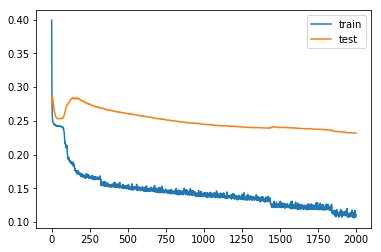

In [5]:
# define model
model = Sequential()
model.add(LSTM(150, activation='softmax', input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.019))
model.add(Dense(100,activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.02))
model.add(Dense(n_output,activation='relu'))
model.compile(optimizer='adagrad', loss='mae')
history = model.fit(X_train,y_train,epochs=2000,validation_data=(X_test, y_test),verbose=2,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [6]:
#X_test = X_test.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test)
n_yhat = yhat.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_yhat = scaler.inverse_transform(n_yhat)
inv_yhat = inv_yhat[:,4:7]
y_test = y_test.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_y = scaler.inverse_transform(y_test)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 656.654


In [7]:
i=0
ninhat=[]
x_input = scaled[-12:,:] 
x_input = x_input.reshape((1, n_steps_in, n_features))
nx_input = x_input
while i < 8:
    nyhat = model.predict(nx_input, verbose=0)
    #print(nyhat)
    nx_input = nx_input.reshape((n_steps_in, n_features))
    nyhat = nyhat.reshape((n_steps_out, n_features))
    nx_input = np.append(nx_input[3:,:],nyhat)
    nx_input = nx_input.reshape((1, n_steps_in, n_features))
    ninhat = np.append(ninhat,nyhat)
    i = i+1

In [8]:
print(ninhat.shape)

(192,)


In [9]:
ninhat = ninhat.reshape((24, n_features))
ninhat = scaler.inverse_transform(ninhat)

In [10]:
print(ninhat.shape)
print(ninhat[:,4:7])

(24, 8)
[[2.25428857e+02 3.74101327e-02 1.22065258e+03]
 [2.52982697e+02 3.47874954e-02 1.32592215e+03]
 [2.36785746e+02 3.72954422e-02 1.27485783e+03]
 [3.36056253e+02 0.00000000e+00 1.35155462e+03]
 [3.49588582e+02 0.00000000e+00 1.36655439e+03]
 [3.42134576e+02 0.00000000e+00 1.35646660e+03]
 [3.75552837e+02 0.00000000e+00 1.35115674e+03]
 [3.83877397e+02 0.00000000e+00 1.34595070e+03]
 [3.80000955e+02 0.00000000e+00 1.34888887e+03]
 [3.91361196e+02 0.00000000e+00 1.33764141e+03]
 [3.97505326e+02 0.00000000e+00 1.32619057e+03]
 [3.95254225e+02 0.00000000e+00 1.33412413e+03]
 [3.97983527e+02 0.00000000e+00 1.32963107e+03]
 [4.03128995e+02 0.00000000e+00 1.31599068e+03]
 [4.01640232e+02 0.00000000e+00 1.32563361e+03]
 [4.01034155e+02 0.00000000e+00 1.31890791e+03]
 [4.05536971e+02 0.00000000e+00 1.30542485e+03]
 [4.04583461e+02 0.00000000e+00 1.31511945e+03]
 [4.02513449e+02 0.00000000e+00 1.30868494e+03]
 [4.06633151e+02 0.00000000e+00 1.29601940e+03]
 [4.06032654e+02 0.00000000e+00 

In [11]:
print(nx_input.shape)
print(nyhat.shape)

(1, 12, 8)
(3, 8)


In [12]:
nin_yhat = nx_input.reshape((n_steps_in, n_features))
ninv_yhat = scaler.inverse_transform(nin_yhat)
print(ninv_yhat.shape)

(12, 8)


In [13]:
print(ninv_yhat[:,4:7])

[[ 397.98352    0.      1329.6311 ]
 [ 403.129      0.      1315.9907 ]
 [ 401.64023    0.      1325.6337 ]
 [ 401.03415    0.      1318.908  ]
 [ 405.53696    0.      1305.4248 ]
 [ 404.58347    0.      1315.1195 ]
 [ 402.51346    0.      1308.6849 ]
 [ 406.63315    0.      1296.0194 ]
 [ 406.03265    0.      1305.5066 ]
 [ 403.3129     0.      1300.1583 ]
 [ 407.18323    0.      1288.3777 ]
 [ 406.82904    0.      1297.6146 ]]


In [14]:
#print(nx_input[0,2] ,nx_input[0,5])

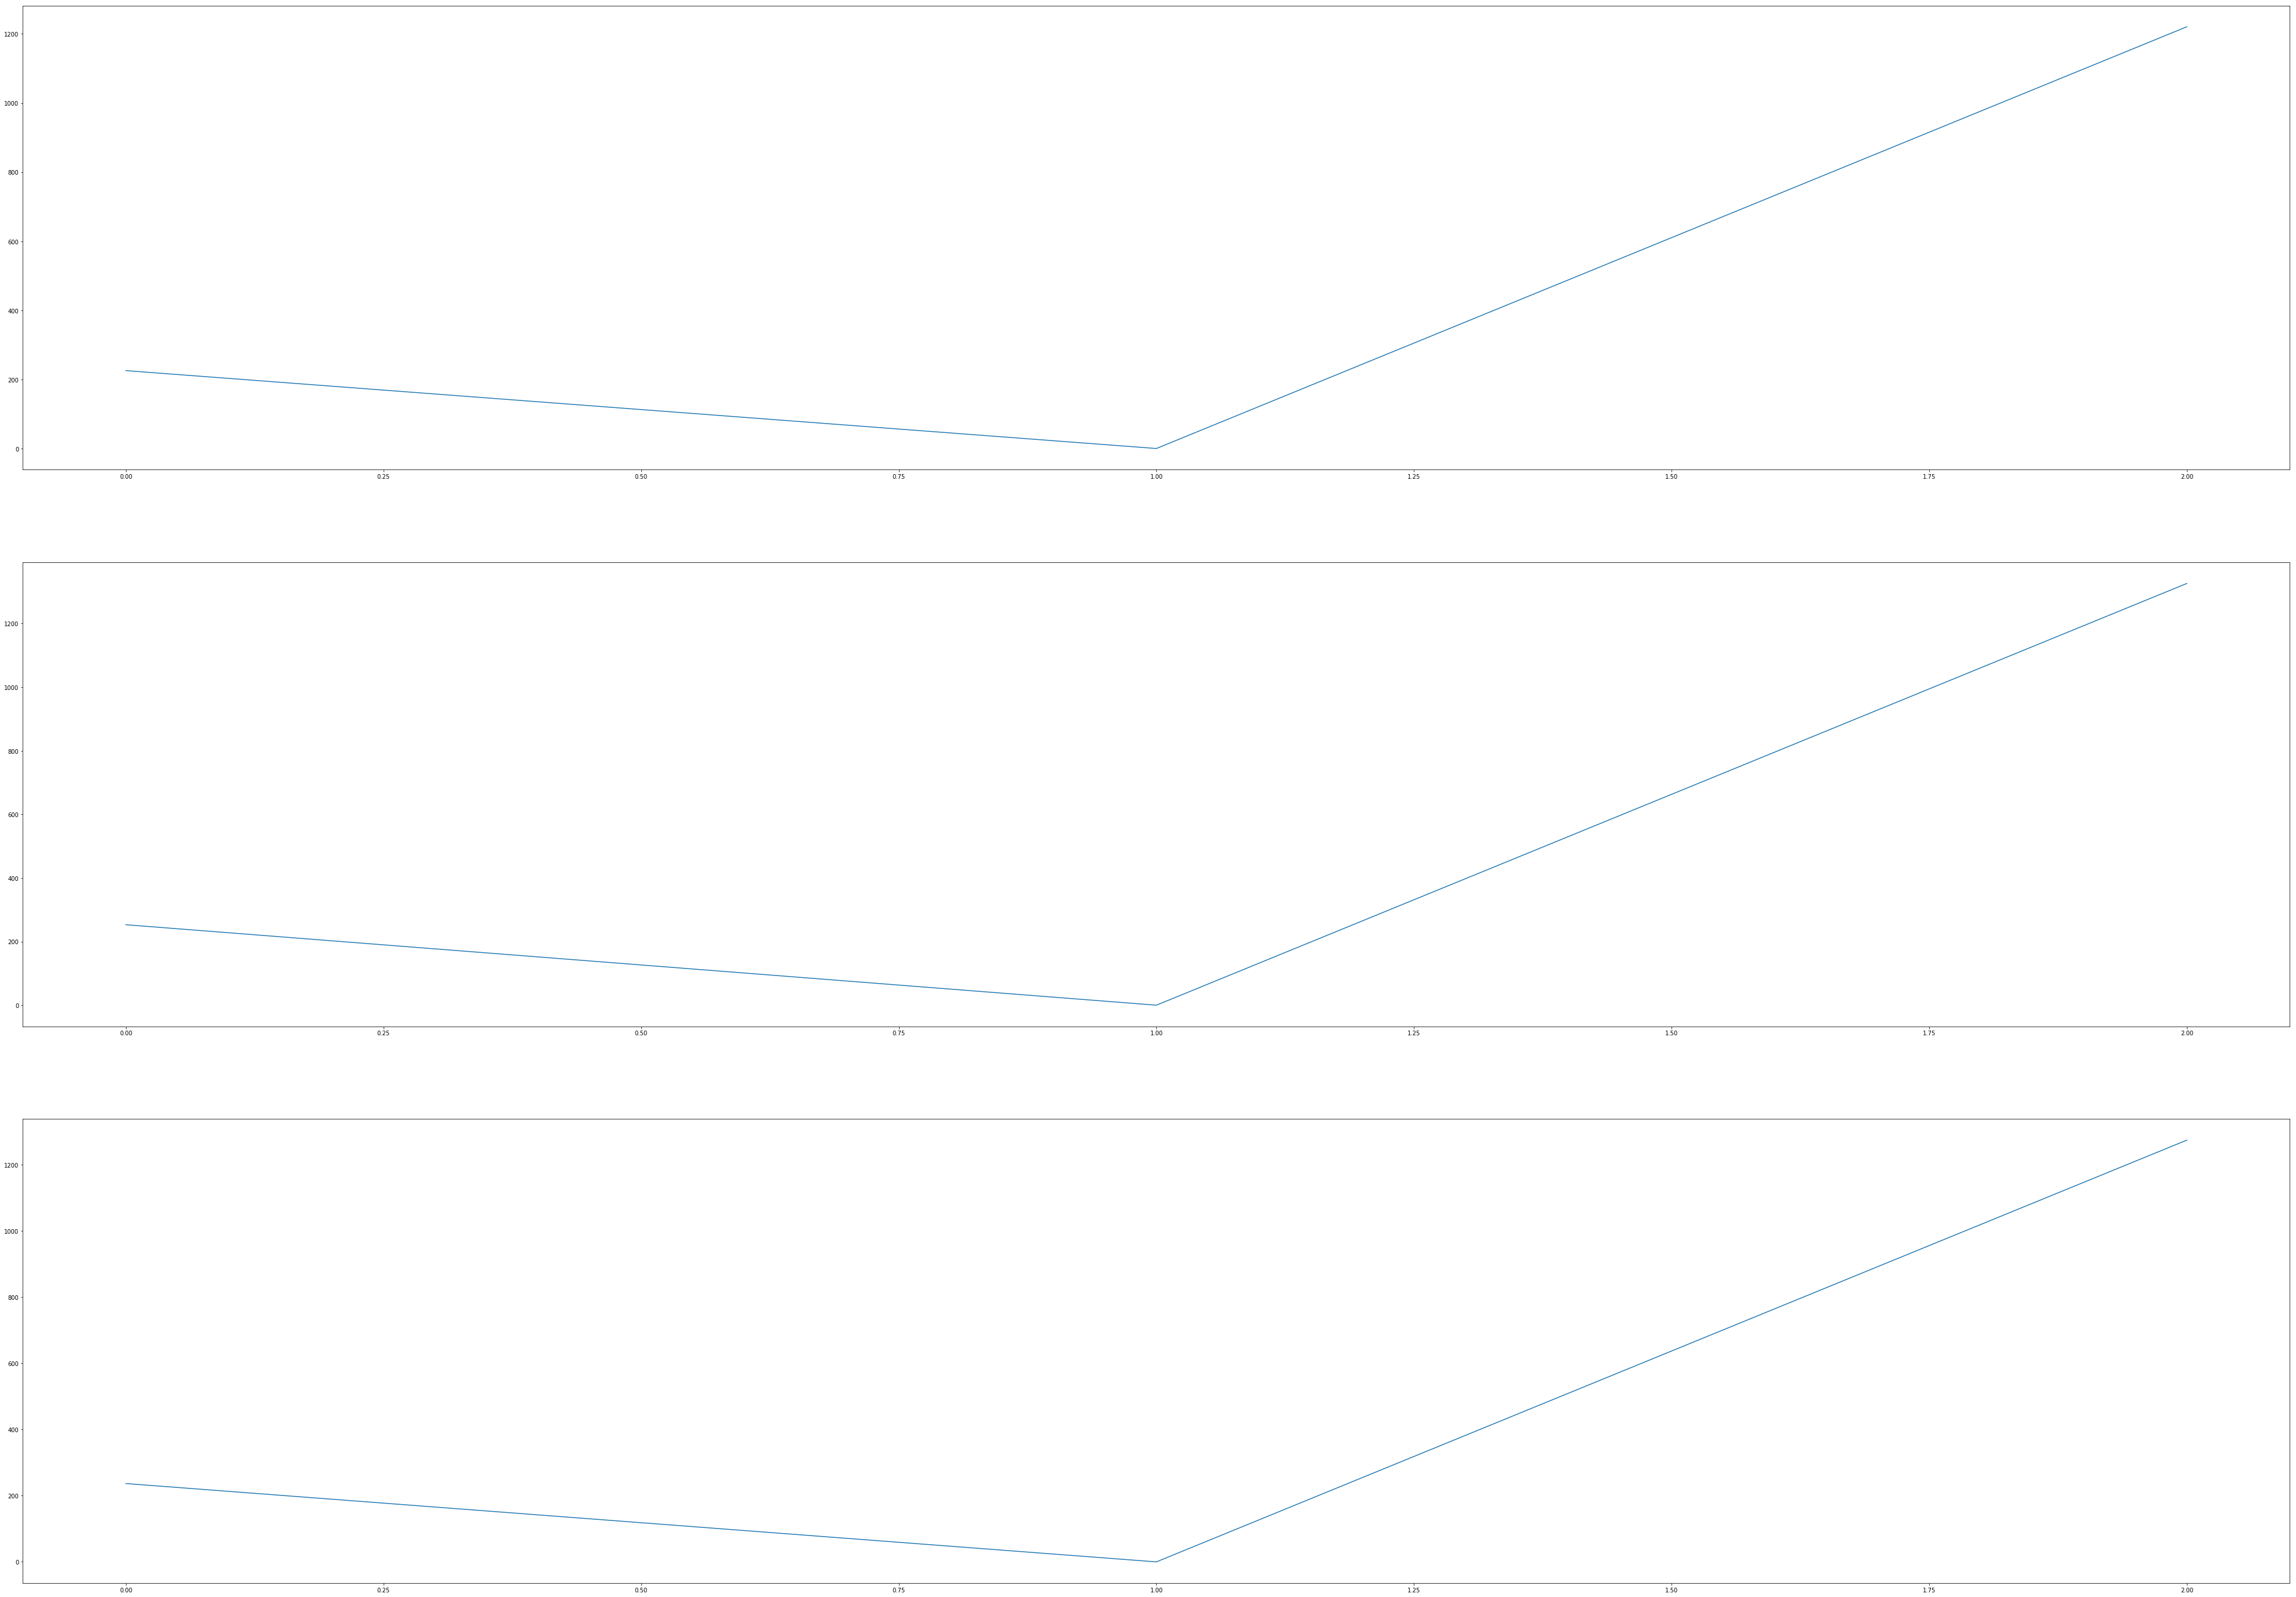

In [15]:
groups = [0,1,2]
i = 1
# plot each column
plt.figure(figsize=(70,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(ninhat[group, 4:7])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [16]:
new = dataset

In [17]:
new.shape

(280, 8)

In [18]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [19]:
new.index

Index(['01/09/1991', '01/10/1991', '01/11/1991', '01/12/1991', '01/01/1992',
       '01/02/1992', '01/03/1992', '01/04/1992', '01/05/1992', '01/06/1992',
       ...
       '01/03/2014', '01/04/2014', '01/05/2014', '01/06/2014', '01/07/2014',
       '01/08/2014', '01/09/2014', '01/10/2014', '01/11/2014', '01/12/2014'],
      dtype='object', name='Date', length=280)

In [20]:
nin=new.index[-1]
print(nin)

01/12/2014


In [21]:
newxhat= pd.DataFrame(ninhat,columns=[c for c in new.columns] )

In [22]:
newxhat.shape

(24, 8)

In [23]:
new=new.append(newxhat)
new.shape

(304, 8)

In [24]:
new.head(4)

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
01/09/1991,672.0,18.0,11.3,148.407080,362.908461,0.0,408.938053,0.0
01/10/1991,1087.0,18.0,29.0,403.517241,513.944398,0.0,785.137931,0.0
01/11/1991,928.0,23.0,29.8,505.671141,380.992112,0.0,1327.248322,0.0
01/12/1991,863.0,26.0,25.2,742.777778,371.964548,0.0,1996.904762,0.0


In [26]:
newbori = new.to_csv('newbori3.csv')